In [1]:
from matplotlib.pyplot import imshow
import matplotlib.cm as cm
import matplotlib.pylab as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import PIL
from PIL import ImageFilter
import cv2
import itertools
import random
import keras
import imutils
from imutils import paths
import os
from keras import optimizers
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose
from keras import backend as K

%matplotlib inline

In [2]:
def pil_image(img_path):
    pil_im =PIL.Image.open(img_path).convert('L')
    pil_im=pil_im.resize((105,105))
    #imshow(np.asarray(pil_im))
    return pil_im

# Augumentation Steps 
1) Noise
2) Blur
3) Perpective Rotation
4) Shading
5) Variable Character Spacing
6) Variable Aspect Ratio

In [3]:
def noise_image(pil_im):
    # Adding Noise to image
    img_array = np.asarray(pil_im)
    mean = 0.0   # some constant
    std = 5   # some constant (standard deviation)
    noisy_img = img_array + np.random.normal(mean, std, img_array.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255)
    noise_img = PIL.Image.fromarray(np.uint8(noisy_img_clipped)) # output
    #imshow((noisy_img_clipped ).astype(np.uint8))
    noise_img=noise_img.resize((105,105))
    return noise_img

In [4]:
def blur_image(pil_im):
    #Adding Blur to image 
    blur_img = pil_im.filter(ImageFilter.GaussianBlur(radius=3)) # ouput
    #imshow(blur_img)
    blur_img=blur_img.resize((105,105))
    return blur_img

In [5]:
def affine_rotation(img):
    
    #img=cv2.imread(img_path,0)
    rows, columns = img.shape

    point1 = np.float32([[10, 10], [30, 10], [10, 30]])
    point2 = np.float32([[20, 15], [40, 10], [20, 40]])

    A = cv2.getAffineTransform(point1, point2)

    output = cv2.warpAffine(img, A, (columns, rows))
    affine_img = PIL.Image.fromarray(np.uint8(output)) # affine rotated output
    #imshow(output)
    affine_img=affine_img.resize((105,105))
    return affine_img
   

In [6]:
def gradient_fill(image):
    #image=cv2.imread(img_path,0)
    laplacian = cv2.Laplacian(image,cv2.CV_64F)
    laplacian = cv2.resize(laplacian, (105, 105))
    return laplacian

## Preparing Dataset

In [7]:
data_path = "font_patch/"
data=[]
labels=[]
imagePaths = sorted(list(paths.list_images(data_path)))
random.seed(42)
random.shuffle(imagePaths)

In [8]:
def conv_label(label):
    if label == 'font_patch/Lato':
        return 0
    elif label == 'font_patch/Raleway':
        return 1
    elif label == 'font_patch/Roboto':
        return 2
    elif label == 'font_patch/Sansation':
        return 3
    elif label == 'font_patch/Walkway':
        return 4

In [9]:
augument=["blur","noise","affine","gradient"]
a=itertools.combinations(augument, 4)

for i in list(a): 
    print(list(i))

['blur', 'noise', 'affine', 'gradient']


In [10]:
counter=0
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    label = conv_label(label)
    pil_img = pil_image(imagePath)
    #imshow(pil_img)
    
    # Adding original image
    org_img = img_to_array(pil_img)
    #print(org_img.shape)
    data.append(org_img)
    labels.append(label)
    
    augument=["noise","blur","affine","gradient"]
    for l in range(0,len(augument)):
    
        a=itertools.combinations(augument, l+1)

        for i in list(a): 
            combinations=list(i)
            print(len(combinations))
            temp_img = pil_img
            for j in combinations:
            
                if j == 'noise':
                    # Adding Noise image
                    temp_img = noise_image(temp_img)
                    
                elif j == 'blur':
                    # Adding Blur image
                    temp_img = blur_image(temp_img)
                    #imshow(blur_img)
                    
    
                elif j == 'affine':
                    open_cv_affine = np.array(pil_img)
                    # Adding affine rotation image
                    temp_img = affine_rotation(open_cv_affine)

                elif j == 'gradient':
                    open_cv_gradient = np.array(pil_img)
                    # Adding gradient image
                    temp_img = gradient_fill(open_cv_gradient)
  
            temp_img = img_to_array(temp_img)
            data.append(temp_img)
            labels.append(label)

1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2


In [11]:
data = np.asarray(data, dtype="float") / 255.0
labels = np.array(labels)
print("Success")
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

Success


In [12]:
# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=5)
testY = to_categorical(testY, num_classes=5)

In [13]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)

In [14]:
K.set_image_data_format('channels_last')

In [15]:
 def create_model():
  model=Sequential()

  # Cu Layers 
  model.add(Conv2D(64, kernel_size=(48, 48), activation='relu', input_shape=(105,105,1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, kernel_size=(24, 24), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2DTranspose(128, (24,24), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
  model.add(UpSampling2D(size=(2, 2)))

  model.add(Conv2DTranspose(64, (12,12), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
  model.add(UpSampling2D(size=(2, 2)))

  #Cs Layers
  model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

  model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

  model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

  model.add(Flatten())

  model.add(Dense(4096, activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(4096,activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(2383,activation='relu'))

  model.add(Dense(5, activation='softmax'))
 
  return model

In [16]:
import tensorflow as tf
batch_size = 128
epochs = 50
model= create_model()
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True, name='SGD')
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

In [17]:
early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min')

filepath="top_model.h5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [early_stopping,checkpoint]

In [ ]:
model.fit(trainX, trainY,shuffle=True,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(testX, testY),callbacks=callbacks_list)

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.8792 
Epoch 00001: val_loss did not improve from 0.14456
10/10 [==============================] - 567s 57s/step - loss: 0.0336 - accuracy: 0.8792 - val_loss: 0.2232 - val_accuracy: 0.2275
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.0290 - accuracy: 0.9067 
Epoch 00002: val_loss did not improve from 0.14456
10/10 [==============================] - 576s 58s/step - loss: 0.0290 - accuracy: 0.9067 - val_loss: 0.2426 - val_accuracy: 0.2175
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.9150 
Epoch 00003: val_loss did not improve from 0.14456
10/10 [==============================] - 574s 57s/step - loss: 0.0246 - accuracy: 0.9150 - val_loss: 0.2350 - val_accuracy: 0.2325
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9250 
Epoch 00004: val_loss did not improve from 0.14456
10/10 [================

In [18]:
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16000358760356903
Test accuracy: 0.22499999403953552


In [19]:
from keras.models import load_model
model = load_model('top_model.h5')

In [20]:
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.01113548781722784
Test accuracy: 0.9574999809265137


In [66]:
def blur_img(pil_im):
    #Adding Blur to image 
    blur_img = pil_im.filter(ImageFilter.GaussianBlur(radius=3)) # ouput
    #imshow(blur_img)
    blur_img=blur_img.resize((105,105))
    return blur_img

img_path="sample/roboto.jpg"
pil_im =PIL.Image.open(img_path).convert('L')
pil_im=blur_img(pil_im)
org_img = img_to_array(pil_im)

In [67]:
def rev_conv_label(label):
    print('{:.2f}% Lato'.format(label[0][0]*100))
    print('{:.2f}% Raleway'.format(label[0][1]*100))
    print('{:.2f}% Roboto'.format(label[0][2]*100))
    print('{:.2f}% Sansation'.format(label[0][3]*100))
    print('{:.2f}% Walkway'.format(label[0][4]*100))

In [68]:
data=[]
data.append(org_img)
data = np.asarray(data, dtype="float") / 255.0

In [69]:
y = model.predict(data)
print(y)

[[2.3906234e-06 1.0744799e-07 9.9999428e-01 1.1749842e-06 2.0106661e-06]]


0.00% Lato
0.00% Raleway
100.00% Roboto
0.00% Sansation
0.00% Walkway


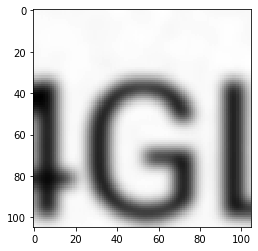

In [70]:
label = rev_conv_label(y)
fig, ax = plt.subplots(1)
ax.imshow(pil_im, interpolation='nearest', cmap=cm.gray)
ax.text(5, 5, label , bbox={'facecolor': 'white', 'pad': 10})
plt.show()